In [1]:
!nvidia-smi

Wed Dec 20 14:53:10 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [26]:
import os
import requests
import zipfile
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import tensorflow as tf
import keras
import urllib.request
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [4]:
# Membuat direktori baru
folder_name = 'dataset'
path = '/content/' + folder_name

os.makedirs(path, exist_ok=True)

In [5]:
import zipfile
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/dataset.zip', 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [7]:
# Mengekstrak file zip
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall(path)

In [8]:
base_dir = 'dataset/dataset'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of training directory:")
print(os.listdir(f'{base_dir}/training'))

print("\nContents of testing directory:")
print(os.listdir(f'{base_dir}/testing'))

Contents of base directory:
['training', 'testing']

Contents of training directory:
['Tomat', 'Apel', 'Beras Putih', 'Melon', 'Kacang Polong', 'Ikan Tuna', 'Jagung', 'Oatmeal', 'Kentang', 'Brokoli', 'Edamame', 'Bawang Merah', 'Telur Ayam', 'Telur Puyuh', 'Bawang Bombai', 'Daun Bawang', 'Bawang Putih', 'Alpukat', 'Pepaya', 'Pisang', 'Beras Merah', 'Ikan Salmon', 'Labu Putih', 'Buah Naga', 'Wortel', 'Pakcoy', 'Udang', 'Daging Ayam', 'Kacang Kedelai', 'Kacang Merah', 'Buncis', 'Labu Siam', 'Daging Sapi', 'Bayam', 'Tauge', 'Kacang Hijau']

Contents of testing directory:
['Tomat', 'Apel', 'Beras Putih', 'Melon', 'Kacang Polong', 'Ikan Tuna', 'Jagung', 'Oatmeal', 'Kentang', 'Brokoli', 'Edamame', 'Bawang Merah', 'Telur Ayam', 'Telur Puyuh', 'Bawang Bombai', 'Daun Bawang', 'Bawang Putih', 'Alpukat', 'Pepaya', 'Pisang', 'Beras Merah', 'Ikan Salmon', 'Labu Putih', 'Buah Naga', 'Wortel', 'Pakcoy', 'Udang', 'Daging Ayam', 'Kacang Kedelai', 'Kacang Merah', 'Buncis', 'Labu Siam', 'Daging Sapi', 'Ba

In [9]:
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'testing')

# Directory with training pictures
train_alpukat_dir = os.path.join(train_dir, 'Alpukat')
train_apel_dir = os.path.join(train_dir, 'Apel')
train_bawangbombai_dir = os.path.join(train_dir, 'Bawang Bombai')
train_bawangmerah_dir = os.path.join(train_dir, 'Bawang Merah')
train_bawangputih_dir = os.path.join(train_dir, 'Bawang Putih')
train_bayam_dir = os.path.join(train_dir, 'Bayam')
train_berasmerah_dir = os.path.join(train_dir, 'Beras Merah')
train_berasputih_dir = os.path.join(train_dir, 'Beras Putih')
train_brokoli_dir = os.path.join(train_dir, 'Brokoli')
train_buahnaga_dir = os.path.join(train_dir, 'Buah Naga')
train_buncis_dir = os.path.join(train_dir, 'Buncis')
train_dagingayam_dir = os.path.join(train_dir, 'Daging Ayam')
train_dagingsapi_dir = os.path.join(train_dir, 'Daging Sapi')
train_daunbawang_dir = os.path.join(train_dir, 'Daun Bawang')
train_edamame_dir = os.path.join(train_dir, 'Edamame')
train_ikansalmon_dir = os.path.join(train_dir, 'Ikan Salmon')
train_ikantuna_dir = os.path.join(train_dir, 'Ikan Tuna')
train_jagung_dir = os.path.join(train_dir, 'Jagung')
train_kacanghijau_dir = os.path.join(train_dir, 'Kacang Hijau')
train_kacangkedelai_dir = os.path.join(train_dir, 'Kacang Kedelai')
train_kacangmerah_dir = os.path.join(train_dir, 'Kacang Merah')
train_kacangpolong_dir = os.path.join(train_dir, 'Kacang Polong')
train_kentang_dir = os.path.join(train_dir, 'Kentang')
train_labuputih_dir = os.path.join(train_dir, 'Labu Putih')
train_labusiam_dir = os.path.join(train_dir, 'Labu Siam')
train_melon_dir = os.path.join(train_dir, 'Melon')
train_oatmeal_dir = os.path.join(train_dir, 'Oatmeal')
train_pakcoy_dir = os.path.join(train_dir, 'Pakcoy')
train_pepaya_dir = os.path.join(train_dir, 'Pepaya')
train_pisang_dir = os.path.join(train_dir, 'Pisang')
train_tauge_dir = os.path.join(train_dir, 'Tauge')
train_telurayam_dir = os.path.join(train_dir, 'Telur Ayam')
train_telurpuyuh_dir = os.path.join(train_dir, 'Telur Puyuh')
train_tomat_dir = os.path.join(train_dir, 'Tomat')
train_udang_dir = os.path.join(train_dir, 'Udang')
train_wortel_dir = os.path.join(train_dir, 'Wortel')

# Directory with validation pictures
validation_alpukat_dir = os.path.join(validation_dir, 'Alpukat')
validation_apel_dir = os.path.join(validation_dir, 'Apel')
validation_bawangbombai_dir = os.path.join(validation_dir, 'Bawang Bombai')
validation_bawangmerah_dir = os.path.join(validation_dir, 'Bawang Merah')
validation_bawangputih_dir = os.path.join(validation_dir, 'Bawang Putih')
validation_bayam_dir = os.path.join(validation_dir, 'Bayam')
validation_berasmerah_dir = os.path.join(validation_dir, 'Beras Merah')
validation_berasputih_dir = os.path.join(validation_dir, 'Beras Putih')
validation_brokoli_dir = os.path.join(validation_dir, 'Brokoli')
validation_buahnaga_dir = os.path.join(validation_dir, 'Buah Naga')
validation_buncis_dir = os.path.join(validation_dir, 'Buncis')
validation_dagingayam_dir = os.path.join(validation_dir, 'Daging Ayam')
validation_dagingsapi_dir = os.path.join(validation_dir, 'Daging Sapi')
validation_daunbawang_dir = os.path.join(validation_dir, 'Daun Bawang')
validation_edamame_dir = os.path.join(validation_dir, 'Edamame')
validation_ikansalmon_dir = os.path.join(validation_dir, 'Ikan Salmon')
validation_ikantuna_dir = os.path.join(validation_dir, 'Ikan Tuna')
validation_jagung_dir = os.path.join(validation_dir, 'Jagung')
validation_kacanghijau_dir = os.path.join(validation_dir, 'Kacang Hijau')
validation_kacangkedelai_dir = os.path.join(validation_dir, 'Kacang Kedelai')
validation_kacangmerah_dir = os.path.join(validation_dir, 'Kacang Merah')
validation_kacangpolong_dir = os.path.join(validation_dir, 'Kacang Polong')
validation_kentang_dir = os.path.join(validation_dir, 'Kentang')
validation_labuputih_dir = os.path.join(validation_dir, 'Labu Putih')
validation_labusiam_dir = os.path.join(validation_dir, 'Labu Siam')
validation_melon_dir = os.path.join(validation_dir, 'Melon')
validation_oatmeal_dir = os.path.join(validation_dir, 'Oatmeal')
validation_pakcoy_dir = os.path.join(validation_dir, 'Pakcoy')
validation_pepaya_dir = os.path.join(validation_dir, 'Pepaya')
validation_pisang_dir = os.path.join(validation_dir, 'Pisang')
validation_tauge_dir = os.path.join(validation_dir, 'Tauge')
validation_telurayam_dir = os.path.join(validation_dir, 'Telur Ayam')
validation_telurpuyuh_dir = os.path.join(validation_dir, 'Telur Puyuh')
validation_tomat_dir = os.path.join(validation_dir, 'Tomat')
validation_udang_dir = os.path.join(validation_dir, 'Udang')
validation_wortel_dir = os.path.join(validation_dir, 'Wortel')


In [10]:
train_alpukat_fnames = os.listdir(train_alpukat_dir)
train_apel_fnames = os.listdir(train_apel_dir)
train_bawangbombai_fnames = os.listdir(train_bawangbombai_dir)
train_bawangmerah_fnames = os.listdir(train_bawangmerah_dir)
train_bawangputih_fnames = os.listdir(train_bawangputih_dir)
train_bayam_fnames = os.listdir(train_bayam_dir)
train_berasmerah_fnames = os.listdir(train_berasmerah_dir)
train_berasputih_fnames = os.listdir(train_berasputih_dir)
train_brokoli_fnames = os.listdir(train_brokoli_dir)
train_buahnaga_fnames = os.listdir(train_buahnaga_dir)
train_buncis_fnames = os.listdir(train_buncis_dir)
train_dagingayam_fnames = os.listdir(train_dagingayam_dir)
train_dagingsapi_fnames = os.listdir(train_dagingsapi_dir)
train_daunbawang_fnames = os.listdir(train_daunbawang_dir)
train_edamame_fnames = os.listdir(train_edamame_dir)
train_ikansalmon_fnames = os.listdir(train_ikansalmon_dir)
train_ikantuna_fnames = os.listdir(train_ikantuna_dir)
train_jagung_fnames = os.listdir(train_jagung_dir)
train_kacanghijau_fnames = os.listdir(train_kacanghijau_dir)
train_kacangkedelai_fnames = os.listdir(train_kacangkedelai_dir)
train_kacangmerah_fnames = os.listdir(train_kacangmerah_dir)
train_kacangpolong_fnames = os.listdir(train_kacangpolong_dir)
train_kentang_fnames = os.listdir(train_kentang_dir)
train_labuputih_fnames = os.listdir(train_labuputih_dir)
train_labusiam_fnames = os.listdir(train_labusiam_dir)
train_melon_fnames = os.listdir(train_melon_dir)
train_oatmeal_fnames = os.listdir(train_oatmeal_dir)
train_pakcoy_fnames = os.listdir(train_pakcoy_dir)
train_pepaya_fnames = os.listdir(train_pepaya_dir)
train_pisang_fnames = os.listdir(train_pisang_dir)
train_tauge_fnames = os.listdir(train_tauge_dir)
train_telurayam_fnames = os.listdir(train_telurayam_dir)
train_telurpuyuh_fnames = os.listdir(train_telurpuyuh_dir)
train_tomat_fnames = os.listdir(train_tomat_dir)
train_udang_fnames = os.listdir(train_udang_dir)
train_wortel_fnames = os.listdir(train_wortel_dir)


print(train_alpukat_fnames[:10])
print(train_apel_fnames[:10])
print(train_bawangbombai_fnames[:10])
print(train_bawangmerah_fnames[:10])
print(train_bawangputih_fnames[:10])
print(train_bayam_fnames[:10])
print(train_berasmerah_fnames[:10])
print(train_berasputih_fnames[:10])
print(train_brokoli_fnames[:10])
print(train_buahnaga_fnames[:10])
print(train_buncis_fnames[:10])
print(train_dagingayam_fnames[:10])
print(train_dagingsapi_fnames[:10])
print(train_daunbawang_fnames[:10])
print(train_edamame_fnames[:10])
print(train_ikansalmon_fnames[:10])
print(train_ikantuna_fnames[:10])
print(train_jagung_fnames[:10])
print(train_kacanghijau_fnames[:10])
print(train_kacangkedelai_fnames[:10])
print(train_kacangmerah_fnames[:10])
print(train_kacangpolong_fnames[:10])
print(train_kentang_fnames[:10])
print(train_labuputih_fnames[:10])
print(train_labusiam_fnames[:10])
print(train_melon_fnames[:10])
print(train_oatmeal_fnames[:10])
print(train_pakcoy_fnames[:10])
print(train_pepaya_fnames[:10])
print(train_pisang_fnames[:10])
print(train_tauge_fnames[:10])
print(train_telurayam_fnames[:10])
print(train_telurpuyuh_fnames[:10])
print(train_tomat_fnames[:10])
print(train_udang_fnames[:10])
print(train_wortel_fnames[:10])

['istockphoto-172327014-612x612 - Copy (2).jpg', 'istockphoto-887394792-612x612 - Copy (2).jpg', 'istockphoto-912948844-612x612 - Copy.jpg', 'istockphoto-1022053508-612x612 - Copy.jpg', 'istockphoto-912948844-612x612.jpg', 'istockphoto-173939468-612x612 - Copy.jpg', 'istockphoto-172327014-612x612.jpg', 'istockphoto-119247563-612x612 - Copy (2).jpg', 'istockphoto-1361936051-612x612 - Copy.jpg', 'istockphoto-1184766255-612x612 - Copy.jpg']
['img_161.jpeg', 'istockphoto-1415225196-612x612 - Copy.jpg', 'img_3911.jpeg', 'img_1251.jpeg', 'istockphoto-1134031619-612x612.jpg', 'img_4121.jpeg', 'img_21.jpeg', 'istockphoto-1206631949-612x612.jpg', 'img_1181.jpeg', 'img_5001.jpeg']
['7_100.jpg', 'istockphoto-1406250658-612x612.jpg', 'r2_28_100.jpg', 'r2_163_100.jpg', '51_100.jpg', 'r2_113_100.jpg', 'r_30_100.jpg', 'r_100_100.jpg', '68_100.jpg', 'r_64_100.jpg']
['7_100.jpg', '108_100.jpg', 'r2_28_100.jpg', 'r2_163_100.jpg', '51_100.jpg', 'r2_113_100.jpg', 'r_30_100.jpg', 'istockphoto-518535206-612

In [11]:
print('total training alpukat images :', len(os.listdir( train_alpukat_dir ) ))
print('total training apel images :', len(os.listdir( train_apel_dir ) ))
print('total training bawang bombai images :', len(os.listdir( train_bawangbombai_dir ) ))
print('total training bawang merah images :', len(os.listdir( train_bawangmerah_dir ) ))
print('total training bawang putih images :', len(os.listdir( train_bawangputih_dir ) ))
print('total training bayam images :', len(os.listdir( train_bayam_dir ) ))
print('total training beras merah images :', len(os.listdir( train_berasmerah_dir ) ))
print('total training beras putih images :', len(os.listdir( train_berasputih_dir ) ))
print('total training brokoli images :', len(os.listdir( train_brokoli_dir ) ))
print('total training buah naga images :', len(os.listdir( train_buahnaga_dir ) ))
print('total training buncis images :', len(os.listdir( train_buncis_dir ) ))
print('total training daging ayam images :', len(os.listdir( train_dagingayam_dir ) ))
print('total training daging sapi images :', len(os.listdir( train_dagingsapi_dir ) ))
print('total training daun bawang images :', len(os.listdir( train_daunbawang_dir ) ))
print('total training edamame images :', len(os.listdir( train_edamame_dir ) ))
print('total training jagung images :', len(os.listdir( train_jagung_dir ) ))
print('total training kacang hijau images :', len(os.listdir( train_kacanghijau_dir ) ))
print('total training kacang kedelai images :', len(os.listdir( train_kacangkedelai_dir ) ))
print('total training kacang merah images :', len(os.listdir( train_kacangmerah_dir ) ))
print('total training kacang polong images :', len(os.listdir( train_kacangpolong_dir ) ))
print('total training kentang images :', len(os.listdir( train_kentang_dir ) ))
print('total training labu siam images :', len(os.listdir( train_labusiam_dir ) ))
print('total training labu putih images :', len(os.listdir( train_labuputih_dir ) ))
print('total training melon images :', len(os.listdir( train_melon_dir ) ))
print('total training oatmeal images :', len(os.listdir( train_oatmeal_dir ) ))
print('total training pakcoy images :', len(os.listdir( train_pakcoy_dir ) ))
print('total training pisang images :', len(os.listdir( train_pisang_dir ) ))
print('total training tauge images :', len(os.listdir( train_tauge_dir ) ))
print('total training telur ayam images :', len(os.listdir( train_telurayam_dir ) ))
print('total training telur puyuh images :', len(os.listdir( train_telurpuyuh_dir ) ))
print('total training tomat images :', len(os.listdir( train_tomat_dir ) ))
print('total training udang images :', len(os.listdir( train_udang_dir ) ))
print('total training wortel images :', len(os.listdir( train_wortel_dir ) ))

print('total validation alpukat images :', len(os.listdir( validation_alpukat_dir ) ))
print('total validation apel images :', len(os.listdir( validation_apel_dir ) ))
print('total validation bawang bombai images :', len(os.listdir( validation_bawangbombai_dir ) ))
print('total validation bawang merah images :', len(os.listdir( validation_bawangmerah_dir ) ))
print('total validation bawang putih images :', len(os.listdir( validation_bawangputih_dir ) ))
print('total validation bayam images :', len(os.listdir( validation_bayam_dir ) ))
print('total validation beras merah images :', len(os.listdir( validation_berasmerah_dir ) ))
print('total validation beras putih images :', len(os.listdir( validation_berasputih_dir ) ))
print('total validation brokoli images :', len(os.listdir( validation_brokoli_dir ) ))
print('total validation buah naga images :', len(os.listdir( validation_buahnaga_dir ) ))
print('total validation buncis images :', len(os.listdir( validation_buncis_dir ) ))
print('total validation daging ayam images :', len(os.listdir( validation_dagingayam_dir ) ))
print('total validation daging sapi images :', len(os.listdir( validation_dagingsapi_dir ) ))
print('total validation daun bawang images :', len(os.listdir( validation_daunbawang_dir ) ))
print('total validation edamame images :', len(os.listdir( validation_edamame_dir ) ))
print('total validation ikan salmon images :', len(os.listdir( validation_ikansalmon_dir ) ))
print('total validation ikan tuna images :', len(os.listdir( validation_ikantuna_dir ) ))
print('total validation jagung images :', len(os.listdir( validation_jagung_dir ) ))
print('total validation kacang hijau images :', len(os.listdir( validation_kacanghijau_dir ) ))
print('total validation kacang kedelai images :', len(os.listdir( validation_kacangkedelai_dir ) ))
print('total validation kacang merah images :', len(os.listdir( validation_kacangmerah_dir ) ))
print('total validation kacang polong images :', len(os.listdir( validation_kacangpolong_dir ) ))
print('total validation kentang images :', len(os.listdir( validation_kentang_dir ) ))
print('total validation labu putih images :', len(os.listdir( validation_labuputih_dir ) ))
print('total validation labu siam images :', len(os.listdir( validation_labusiam_dir ) ))
print('total validation melon images :', len(os.listdir( validation_melon_dir ) ))
print('total validation oatmeal images :', len(os.listdir( validation_oatmeal_dir ) ))
print('total validation pakcoy images :', len(os.listdir( validation_pakcoy_dir ) ))
print('total validation pepaya images :', len(os.listdir( validation_pepaya_dir ) ))
print('total validation pisang images :', len(os.listdir( validation_pisang_dir ) ))
print('total validation tauge images :', len(os.listdir( validation_tauge_dir ) ))
print('total validation telur ayam images :', len(os.listdir( validation_telurayam_dir ) ))
print('total validation telur puyuh images :', len(os.listdir( validation_telurpuyuh_dir ) ))
print('total validation tomat images :', len(os.listdir( validation_tomat_dir ) ))
print('total validation udang images :', len(os.listdir( validation_udang_dir ) ))
print('total validation wortel images :', len(os.listdir( validation_wortel_dir ) ))

total training alpukat images : 300
total training apel images : 300
total training bawang bombai images : 450
total training bawang merah images : 620
total training bawang putih images : 300
total training bayam images : 300
total training beras merah images : 300
total training beras putih images : 300
total training brokoli images : 300
total training buah naga images : 300
total training buncis images : 300
total training daging ayam images : 300
total training daging sapi images : 300
total training daun bawang images : 300
total training edamame images : 300
total training jagung images : 455
total training kacang hijau images : 300
total training kacang kedelai images : 300
total training kacang merah images : 300
total training kacang polong images : 300
total training kentang images : 330
total training labu siam images : 300
total training labu putih images : 300
total training melon images : 300
total training oatmeal images : 300
total training pakcoy images : 300
total tr

In [12]:
class_name = ['Alpukat', 'Apel','Bawang Bombai', 'Bawang Merah', 'Bawang Putih', 'Bayam', 'Beras Merah', 'Beras Putih', 'Brokoli', 'Buah Naga', 'Buncis', 'Daging Ayam', 'Daging Sapi', 'Daun Bawang', 'Edamame', 'Ikan Salmon', 'Ikan Tuna', 'Jagung', 'Kacang Hijau', 'Kacang Kedelai', 'Kacang Merah', 'Kacang Polong', 'Kentang', 'Labu Putih', 'Labu Siam', 'Melon', 'Oatmeal', 'Pakcoy', 'Pepaya', 'Pisang', 'Tauge', 'Telur Ayam', 'Telur Puyuh', 'Tomat', 'Udang', 'Wortel']

In [13]:
with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_name))

In [14]:
pic_index = 0 # Index for iterating over images

pic_index+=8

next_alpukat_pix = [os.path.join(train_alpukat_dir, fname)
                for fname in train_alpukat_fnames[ pic_index-8:pic_index]
               ]

next_apel_pix = [os.path.join(train_apel_dir, fname)
                for fname in train_apel_fnames[ pic_index-8:pic_index]
               ]

next_bawangbombai_pix = [os.path.join(train_bawangbombai_dir, fname)
                for fname in train_bawangbombai_fnames[ pic_index-8:pic_index]
               ]
next_bawangmerah_pix = [os.path.join(train_bawangmerah_dir, fname)
                for fname in train_bawangmerah_fnames[ pic_index-8:pic_index]
               ]
next_bawangputih_pix = [os.path.join(train_bawangputih_dir, fname)
                for fname in train_bawangputih_fnames[ pic_index-8:pic_index]
               ]
next_bayam_pix = [os.path.join(train_bayam_dir, fname)
                for fname in train_bayam_fnames[ pic_index-8:pic_index]
               ]
next_berasmerah_pix = [os.path.join(train_berasmerah_dir, fname)
                for fname in train_berasmerah_fnames[ pic_index-8:pic_index]
               ]
next_berasputih_pix = [os.path.join(train_berasputih_dir, fname)
                for fname in train_berasputih_fnames[ pic_index-8:pic_index]
               ]
next_brokoli_pix = [os.path.join(train_brokoli_dir, fname)
                for fname in train_brokoli_fnames[ pic_index-8:pic_index]
               ]
next_buahnaga_pix = [os.path.join(train_buahnaga_dir, fname)
                for fname in train_buahnaga_fnames[ pic_index-8:pic_index]
               ]
next_buncis_pix = [os.path.join(train_buncis_dir, fname)
                for fname in train_buncis_fnames[ pic_index-8:pic_index]
               ]
next_dagingayam_pix = [os.path.join(train_dagingayam_dir, fname)
                for fname in train_dagingayam_fnames[ pic_index-8:pic_index]
               ]
next_dagingsapi_pix = [os.path.join(train_dagingsapi_dir, fname)
                for fname in train_dagingsapi_fnames[ pic_index-8:pic_index]
               ]
next_daunbawang_pix = [os.path.join(train_daunbawang_dir, fname)
                for fname in train_daunbawang_fnames[ pic_index-8:pic_index]
               ]
next_edamame_pix = [os.path.join(train_edamame_dir, fname)
                for fname in train_edamame_fnames[ pic_index-8:pic_index]
               ]
next_ikansalmon_pix = [os.path.join(train_ikansalmon_dir, fname)
                for fname in train_ikansalmon_fnames[ pic_index-8:pic_index]
               ]
next_ikantuna_pix = [os.path.join(train_ikantuna_dir, fname)
                for fname in train_ikantuna_fnames[ pic_index-8:pic_index]
               ]
next_jagung_pix = [os.path.join(train_jagung_dir, fname)
                for fname in train_jagung_fnames[ pic_index-8:pic_index]
               ]
next_kacanghijau_pix = [os.path.join(train_kacanghijau_dir, fname)
                for fname in train_kacanghijau_fnames[ pic_index-8:pic_index]
               ]
next_kacangkedelai_pix = [os.path.join(train_kacangkedelai_dir, fname)
                for fname in train_kacangkedelai_fnames[ pic_index-8:pic_index]
               ]
next_kacangmerah_pix = [os.path.join(train_kacangmerah_dir, fname)
                for fname in train_kacangmerah_fnames[ pic_index-8:pic_index]
               ]
next_kacangpolong_pix = [os.path.join(train_kacangpolong_dir, fname)
                for fname in train_kacangpolong_fnames[ pic_index-8:pic_index]
               ]
next_kentang_pix = [os.path.join(train_kentang_dir, fname)
                for fname in train_kentang_fnames[ pic_index-8:pic_index]
               ]
next_labuputih_pix = [os.path.join(train_labuputih_dir, fname)
                for fname in train_labuputih_fnames[ pic_index-8:pic_index]
               ]
next_labusiam_pix = [os.path.join(train_labusiam_dir, fname)
                for fname in train_labusiam_fnames[ pic_index-8:pic_index]
               ]
next_melon_pix = [os.path.join(train_melon_dir, fname)
                for fname in train_melon_fnames[ pic_index-8:pic_index]
               ]
next_oatmeal_pix = [os.path.join(train_oatmeal_dir, fname)
                for fname in train_oatmeal_fnames[ pic_index-8:pic_index]
               ]
next_pakcoy_pix = [os.path.join(train_pakcoy_dir, fname)
                for fname in train_pakcoy_fnames[ pic_index-8:pic_index]
               ]
next_pepaya_pix = [os.path.join(train_pepaya_dir, fname)
                for fname in train_pepaya_fnames[ pic_index-8:pic_index]
               ]
next_pisang_pix = [os.path.join(train_pisang_dir, fname)
                for fname in train_pisang_fnames[ pic_index-8:pic_index]
               ]
next_tauge_pix = [os.path.join(train_tauge_dir, fname)
                for fname in train_tauge_fnames[ pic_index-8:pic_index]
               ]
next_telurayam_pix = [os.path.join(train_telurayam_dir, fname)
                for fname in train_telurayam_fnames[ pic_index-8:pic_index]
               ]
next_telurpuyuh_pix = [os.path.join(train_telurpuyuh_dir, fname)
                for fname in train_telurpuyuh_fnames[ pic_index-8:pic_index]
               ]
next_tomat_pix = [os.path.join(train_tomat_dir, fname)
                for fname in train_tomat_fnames[ pic_index-8:pic_index]
               ]
next_udang_pix = [os.path.join(train_udang_dir, fname)
                for fname in train_udang_fnames[ pic_index-8:pic_index]
               ]
next_wortel_pix = [os.path.join(train_wortel_dir, fname)
                for fname in train_wortel_fnames[ pic_index-8:pic_index]
               ]
j=0
for i, img_path in enumerate(next_alpukat_pix+next_apel_pix+next_bawangbombai_pix+next_bawangmerah_pix+next_bawangputih_pix+next_bayam_pix+next_berasmerah_pix+next_berasputih_pix+next_brokoli_pix+next_buahnaga_pix+next_buncis_pix+next_dagingayam_pix+next_dagingsapi_pix+next_daunbawang_pix+next_edamame_pix+next_ikansalmon_pix+next_ikantuna_pix+next_jagung_pix+next_kacanghijau_pix+next_kacangkedelai_pix+next_kacangmerah_pix+next_kacangpolong_pix+next_kentang_pix+next_labuputih_pix+next_labusiam_pix+next_melon_pix+next_oatmeal_pix+next_pakcoy_pix+next_pepaya_pix+next_pisang_pix+next_tauge_pix+next_telurayam_pix+next_telurpuyuh_pix+next_tomat_pix+next_udang_pix+next_wortel_pix):
  j += 1
nrows = int(j ** 0.5)
ncols = (j // nrows) + 1 if j % nrows != 0 else j // nrows

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
for i, img_path in enumerate(next_alpukat_pix+next_apel_pix+next_bawangbombai_pix+next_bawangmerah_pix+next_bawangputih_pix+next_bayam_pix+next_berasmerah_pix+next_berasputih_pix+next_brokoli_pix+next_buahnaga_pix+next_buncis_pix+next_dagingayam_pix+next_dagingsapi_pix+next_daunbawang_pix+next_edamame_pix+next_ikansalmon_pix+next_ikantuna_pix+next_jagung_pix+next_kacanghijau_pix+next_kacangkedelai_pix+next_kacangmerah_pix+next_kacangpolong_pix+next_kentang_pix+next_labuputih_pix+next_labusiam_pix+next_melon_pix+next_oatmeal_pix+next_pakcoy_pix+next_pepaya_pix+next_pisang_pix+next_tauge_pix+next_telurayam_pix+next_telurpuyuh_pix+next_tomat_pix+next_udang_pix+next_wortel_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [15]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='sparse')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='sparse')

Found 12505 images belonging to 36 classes.
Found 3780 images belonging to 36 classes.


In [16]:
dataset_labels = sorted(validation_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Alpukat' 'Apel' 'Bawang Bombai' 'Bawang Merah' 'Bawang Putih' 'Bayam'
 'Beras Merah' 'Beras Putih' 'Brokoli' 'Buah Naga' 'Buncis' 'Daging Ayam'
 'Daging Sapi' 'Daun Bawang' 'Edamame' 'Ikan Salmon' 'Ikan Tuna' 'Jagung'
 'Kacang Hijau' 'Kacang Kedelai' 'Kacang Merah' 'Kacang Polong' 'Kentang'
 'Labu Putih' 'Labu Siam' 'Melon' 'Oatmeal' 'Pakcoy' 'Pepaya' 'Pisang'
 'Tauge' 'Telur Ayam' 'Telur Puyuh' 'Tomat' 'Udang' 'Wortel']


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [18]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 64 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(36, activation='softmax')
])

In [19]:
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = validation_generator)

Epoch 1/20
626/626 [==============================] - 166s 266ms/step - loss: 0.7861 - accuracy: 0.7395 - val_loss: 0.5934 - val_accuracy: 0.8048
Epoch 2/20
626/626 [==============================] - 165s 264ms/step - loss: 0.6551 - accuracy: 0.7798 - val_loss: 0.6454 - val_accuracy: 0.7836
Epoch 3/20
626/626 [==============================] - 172s 275ms/step - loss: 0.5849 - accuracy: 0.8037 - val_loss: 0.5719 - val_accuracy: 0.8063
Epoch 4/20
626/626 [==============================] - 170s 272ms/step - loss: 0.5240 - accuracy: 0.8272 - val_loss: 0.4672 - val_accuracy: 0.8508
Epoch 5/20
626/626 [==============================] - 167s 267ms/step - loss: 0.4839 - accuracy: 0.8371 - val_loss: 0.4365 - val_accuracy: 0.8524
Epoch 6/20
626/626 [==============================] - 169s 269ms/step - loss: 0.4616 - accuracy: 0.8467 - val_loss: 0.4392 - val_accuracy: 0.8513
Epoch 7/20
626/626 [==============================] - 169s 270ms/step - loss: 0.4126 - accuracy: 0.8605 - val_loss: 0.3663 -

In [21]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


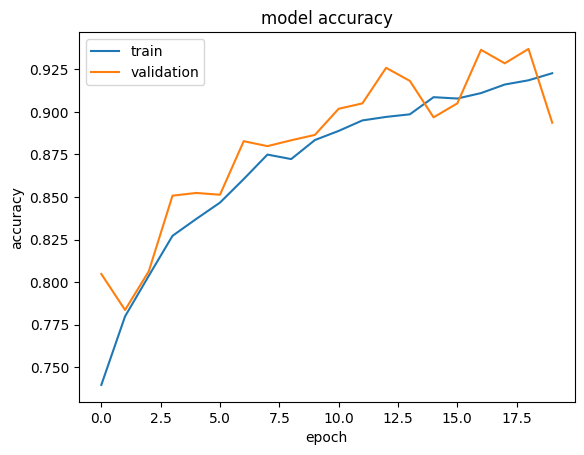

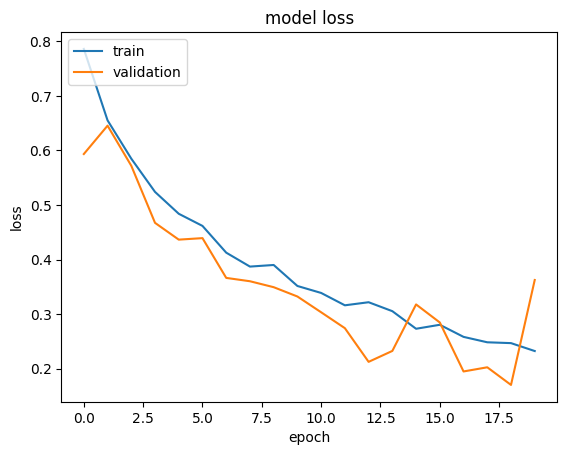

In [22]:
# "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [28]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
